# Plotting the Poles

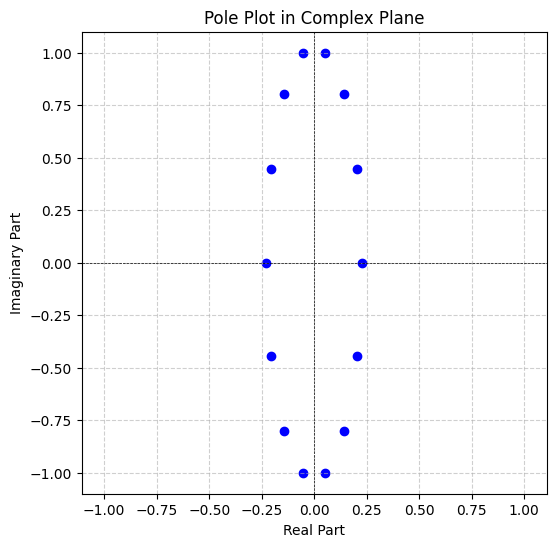

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given constants
A_values = [-0.229, 0.229]  # Two sets of A values
B = 1.026

# Angles in radians
theta = np.array([np.pi * (2*k + 1) / 14 for k in range(7)])

plt.figure(figsize=(6,6))
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

colors = ['blue', 'blue']  # Colors for different A values

for i, A in enumerate(A_values):
    s = A * np.sin(theta) + 1j * B * np.cos(theta)
    plt.scatter(s.real, s.imag, color=colors[i])

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole Plot in Complex Plane')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')  # Ensures uniform scaling on both axes
plt.show()

# BandPass_Filter

<ipython-input-85-a38a9e984285>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


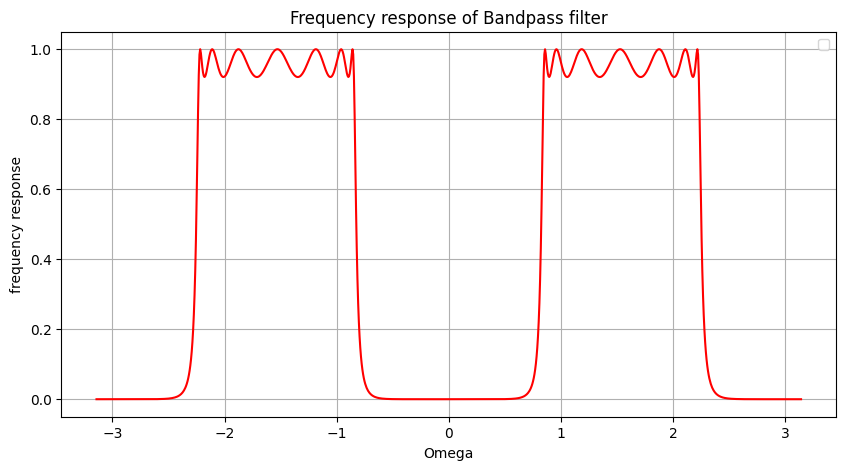

In [ ]:
def BandPassFilter(x):
    Numerator = 1
    Denominator = 1

    for k in range(7):
        term1 = (-1j) * np.cos((2 * k + 1) * np.pi / 14) * np.cosh(0.227540122101)
        term2 = np.sin((2 * k + 1) * np.pi / 14) * np.sinh(0.227540122101)

        fraction = (1 - np.exp(-1j * x)) / (1 + np.exp(-1j * x))
        term3 = (fraction**2 + 0.918) / (1.59 * fraction)

        Numerator *= term1 + term2
        Denominator *= term3 - term1 + term2

    return Numerator / Denominator

x_values = np.linspace(-np.pi, np.pi, 1000)
y_values = np.array([BandPassFilter(x) for x in x_values])
y_values_real = np.nan_to_num(y_values.real, nan=0.0)
y_values_imag = np.nan_to_num(y_values.imag, nan=0.0)

plt.figure(figsize=(10, 5))
plt.plot(x_values, (y_values_real**2 + y_values_imag**2) ** 0.5, color="r",)
plt.xlabel("Omega")
plt.ylabel("frequency response")
plt.legend()
plt.title("Frequency response of Bandpass filter")
plt.grid()
plt.show()

<ipython-input-86-119de972ff5d>:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


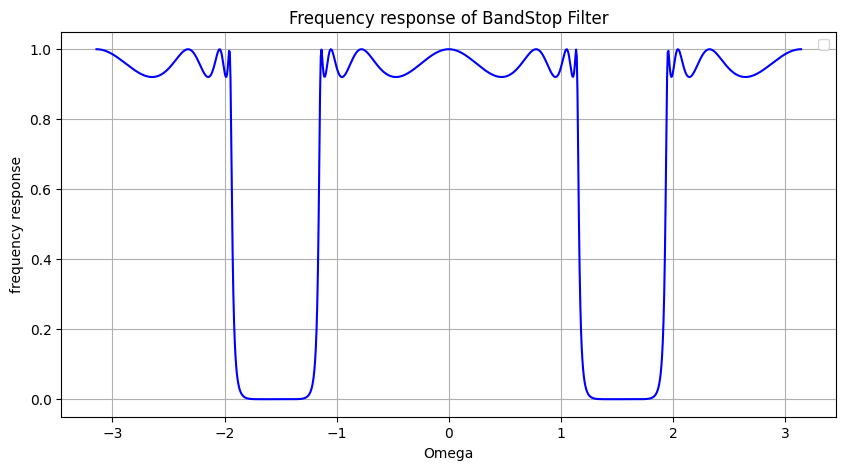

In [ ]:
def BandStopFilter(x):
    Numerator = 1
    Denominator = 1

    for k in range(7):
        term1 = (-1j) * np.cos((2 * k + 1) * np.pi / 14) * np.cosh(0.227540122101)
        term2 = np.sin((2 * k + 1) * np.pi / 14) * np.sinh(0.227540122101)

        fraction = (1 - np.exp(-1j * x)) / (1 + np.exp(-1j * x))
        term3 = (0.825 * fraction) / (fraction**2 + 0.94815)

        Numerator *= term1 + term2
        Denominator *= term3 - term1 + term2

    return Numerator / Denominator


x_values = np.linspace(-np.pi, np.pi, 1000)
y_values = np.array([BandStopFilter(x) for x in x_values])
y_values_real = np.nan_to_num(y_values.real, nan=0.0)
y_values_imag = np.nan_to_num(y_values.imag, nan=0.0)

plt.figure(figsize=(10, 5))
plt.plot(x_values, (y_values_real**2 + y_values_imag**2) ** 0.5, color="b")
plt.xlabel("Omega")
plt.ylabel("frequency response")
plt.legend()
plt.title("Frequency response of BandStop Filter")
plt.grid()
plt.show()

<ipython-input-87-8cd811681eea>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


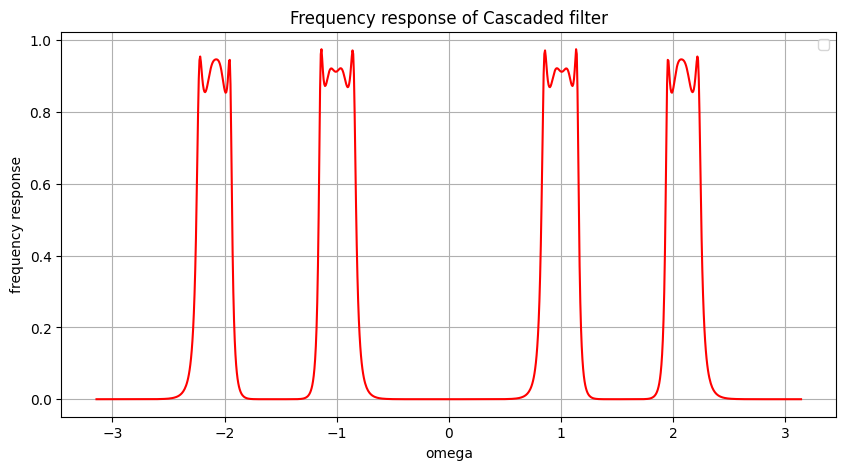

In [ ]:
x_values = np.linspace(-np.pi, np.pi, 1000)
y_values = np.array([BandPassFilter(x)*BandStopFilter(x) for x in x_values])
y_values_real = np.nan_to_num(y_values.real, nan=0.0)
y_values_imag = np.nan_to_num(y_values.imag, nan=0.0)

plt.figure(figsize=(10, 5))
plt.plot(x_values, (y_values_real**2 + y_values_imag**2) ** 0.5, color="r")
plt.xlabel("omega")
plt.ylabel("frequency response")
plt.legend()
plt.title("Frequency response of Cascaded filter")
plt.grid()
plt.show()